In [41]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
from peft import PeftModel, PeftConfig,LoraConfig, get_peft_model
import seaborn as sns


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [426]:
# We just instantiate the model
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")

In [427]:
# To check if it fits the configuration of our files

lora_config = LoraConfig(
    r=32,
    lora_alpha=16,
    target_modules=["q", "k", "v", "wi", "wo", "lm_head"],
    lora_dropout=0.0,
    bias="none",
    task_type="SEQ_2_SEQ_LM"
)

In [428]:
model = get_peft_model(model, lora_config)


In [429]:
state_dict = torch.load("model.checkpoint", map_location="cpu")
state_dict = {k.replace('_LLM_model.', '').replace('module.', ''): v for k, v in state_dict.items()}




In [153]:
for key, value in state_dict.items():
    print(key)

base_model.model.encoder.block.0.layer.0.SelfAttention.q.lora_A.default.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.q.lora_B.default.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.v.lora_A.default.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.v.lora_B.default.weight
base_model.model.encoder.block.1.layer.0.SelfAttention.q.lora_A.default.weight
base_model.model.encoder.block.1.layer.0.SelfAttention.q.lora_B.default.weight
base_model.model.encoder.block.1.layer.0.SelfAttention.v.lora_A.default.weight
base_model.model.encoder.block.1.layer.0.SelfAttention.v.lora_B.default.weight
base_model.model.encoder.block.2.layer.0.SelfAttention.q.lora_A.default.weight
base_model.model.encoder.block.2.layer.0.SelfAttention.q.lora_B.default.weight
base_model.model.encoder.block.2.layer.0.SelfAttention.v.lora_A.default.weight
base_model.model.encoder.block.2.layer.0.SelfAttention.v.lora_B.default.weight
base_model.model.encoder.block.3.layer.0.SelfAttenti

In [145]:
for key, value in model.named_parameters():
    print(key)

base_model.model.shared.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.q.base_layer.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.q.lora_A.default.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.q.lora_B.default.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.k.base_layer.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.k.lora_A.default.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.k.lora_B.default.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.v.base_layer.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.v.lora_A.default.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.v.lora_B.default.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.o.weight
base_model.model.encoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight
base_model.model.encoder.block.0.layer.0.layer_norm.weight
base_model.model.encoder.block.0.layer.1.DenseReluDense.wi_0.

# put the name of the file below in the load

In [430]:
model.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['base_model.model.shared.weight', 'base_model.model.encoder.embed_tokens.weight', 'base_model.model.encoder.block.0.layer.0.SelfAttention.q.base_layer.weight', 'base_model.model.encoder.block.0.layer.0.SelfAttention.k.base_layer.weight', 'base_model.model.encoder.block.0.layer.0.SelfAttention.k.lora_A.default.weight', 'base_model.model.encoder.block.0.layer.0.SelfAttention.k.lora_B.default.weight', 'base_model.model.encoder.block.0.layer.0.SelfAttention.v.base_layer.weight', 'base_model.model.encoder.block.0.layer.0.SelfAttention.o.weight', 'base_model.model.encoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'base_model.model.encoder.block.0.layer.0.layer_norm.weight', 'base_model.model.encoder.block.0.layer.1.DenseReluDense.wi_0.weight', 'base_model.model.encoder.block.0.layer.1.DenseReluDense.wi_1.weight', 'base_model.model.encoder.block.0.layer.1.DenseReluDense.wo.base_layer.weight', 'base_model.model.encoder.block.0.layer.1.DenseR

In [7]:
pip install inseq

In [431]:
model.config.output_attentions = True
model.eval()

PeftModelForSeq2SeqLM(
  (base_model): LoraModel(
    (model): T5ForConditionalGeneration(
      (shared): Embedding(32128, 512)
      (encoder): T5Stack(
        (embed_tokens): Embedding(32128, 512)
        (block): ModuleList(
          (0): T5Block(
            (layer): ModuleList(
              (0): T5LayerSelfAttention(
                (SelfAttention): T5Attention(
                  (q): lora.Linear(
                    (base_layer): Linear(in_features=512, out_features=384, bias=False)
                    (lora_dropout): ModuleDict(
                      (default): Identity()
                    )
                    (lora_A): ModuleDict(
                      (default): Linear(in_features=512, out_features=32, bias=False)
                    )
                    (lora_B): ModuleDict(
                      (default): Linear(in_features=32, out_features=384, bias=False)
                    )
                    (lora_embedding_A): ParameterDict()
                    (lora_embedd

In [432]:
prompt = "<Begin.Possible actions>turn left, turn right, go forward, pick up, drop, toggle <End \
 Possible actions> \
 <Begin Goal> go to a grey box<End Goal>\
 <Begin Current Observation>\
 Observation: You see a wall 3 steps forward, You see a wall 2 steps\
 left, You see a grey ball 1 step right and 1 step forward, You see a\
 grey box 2 steps right and 1 step forward, You see a grey box 3 steps\
 right and 1 step forward<End Current Observation>\
 Next action :"
inputs = tokenizer(prompt, return_tensors="pt")

In [433]:
# Ajout minimal d'un token au décodeur
decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]])

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        decoder_input_ids=decoder_input_ids,
        output_attentions=True,
        return_dict=True
    )
# Extract attention
decoder_attentions = outputs.decoder_attentions  # (num_layers, batch, heads, tgt_len, tgt_len)
encoder_attentions = outputs.encoder_attentions  # (num_layers, batch, heads, src_len, src_len)
cross_attentions   = outputs.cross_attentions  # (batch_size, num_heads, seq_len, seq_len)


In [434]:
src_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tgt_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

In [30]:
encoder_attentions[1].shape

torch.Size([1, 6, 139, 139])

In [31]:
decoder_attentions[0].shape

torch.Size([1, 6, 1, 1])

In [435]:
# calcule the average attention in the final head
att = cross_attentions[-1][0].mean(dim=0).detach().numpy()


In [404]:
tensor_1 = att[0][:35]
tensor_2 = att[0][35:53]
tensor_3 = att[0][53:133]

In [436]:
tensor_1_mean = np.mean(tensor_1)
tensor_2_mean = np.mean(tensor_2)
tensor_3_mean = np.mean(tensor_3)

sum_tensor = tensor_1_mean + tensor_2_mean + tensor_3_mean

list_attention0 = np.stack([tensor_1_mean, tensor_2_mean, tensor_3_mean])/sum_tensor
names_abscisse0 = ['Possible Actions', 'Goal', 'Observation']

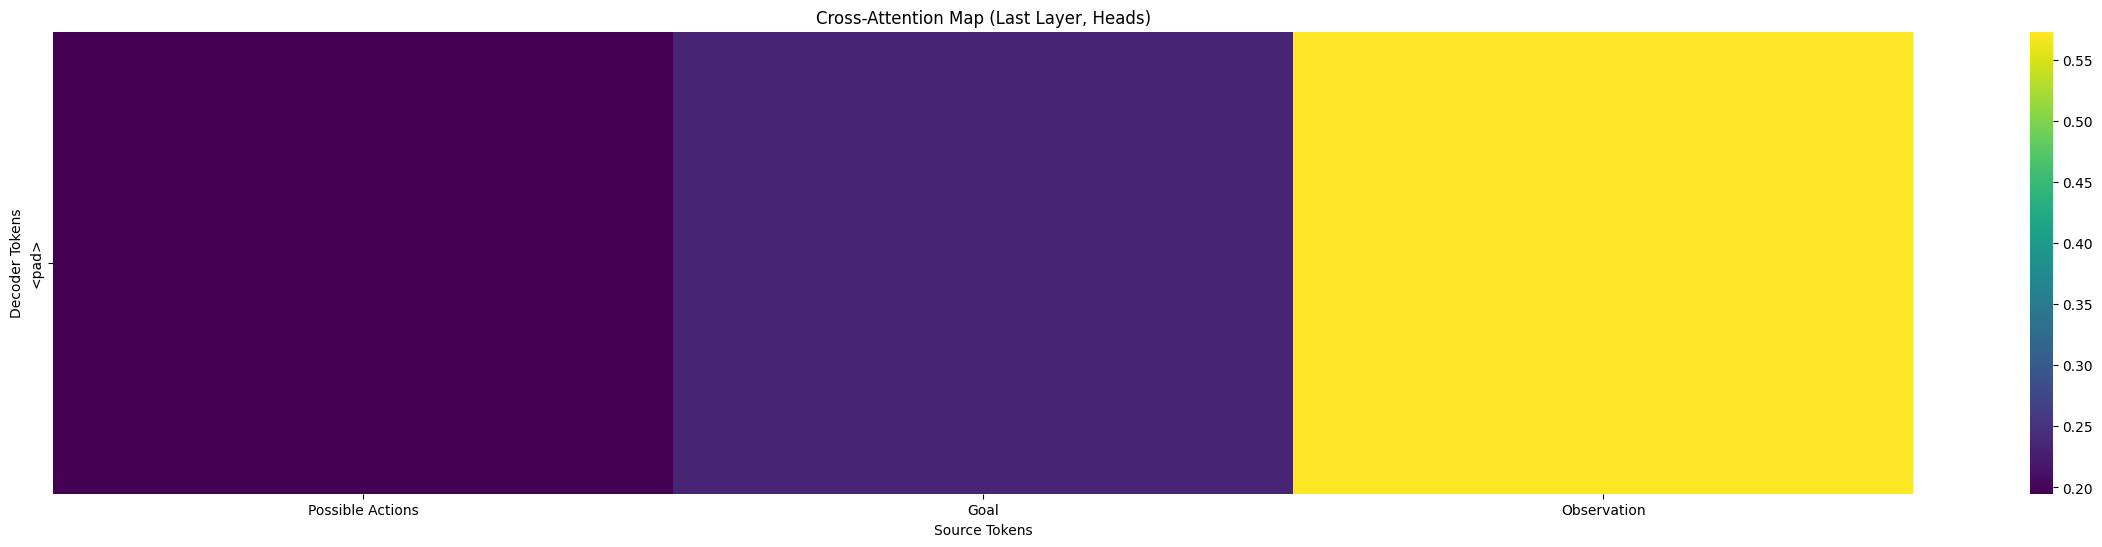

In [437]:
plt.figure(figsize=(30, 6))
sns.heatmap(list_attention0.reshape(1, -1), xticklabels=names_abscisse0, yticklabels=tgt_tokens, cmap="viridis")
plt.title("Cross-Attention Map (Last Layer, Heads)")
plt.xlabel("Source Tokens")
plt.ylabel("Decoder Tokens")
plt.show()

In [438]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list_attention0,
    theta=names_abscisse0,
    fill='toself',
    name='Attention',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=dict(
        text="Spider Graph of Attention",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=False,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()


In [439]:
prompt = "Possible actions of the agent: turn left, turn right, go forward, pick up, drop,toggle \
Goal of the agent: go to the purple box \
Observation: You see a wall 2 steps forward, You see a purple box 2 steps left, You \
see a purple ball 1 step right and 1 step forward, You\
see a grey key 2 steps right Next action :"
inputs = tokenizer(prompt, return_tensors="pt")

# Ajout minimal d'un token au décodeur
decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]])

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        decoder_input_ids=decoder_input_ids,
        output_attentions=True,
        return_dict=True
    )
# Extract attention
decoder_attentions = outputs.decoder_attentions  # (num_layers, batch, heads, tgt_len, tgt_len)
encoder_attentions = outputs.encoder_attentions  # (num_layers, batch, heads, src_len, src_len)
cross_attentions   = outputs.cross_attentions  # (batch_size, num_heads, seq_len, seq_len)

src_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tgt_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

# calcule the average attention in the final head
att = cross_attentions[-1][0].mean(dim=0).detach().numpy()

tensor_1 = att[0][:23]
tensor_2 = att[0][23:34]
tensor_3 = att[0][34:-5]
tensor_4 = att[0][-5:-1]

tensor_1_mean = np.mean(tensor_1)
tensor_2_mean = np.mean(tensor_2)
tensor_3_mean = np.mean(tensor_3)

sum_tensor = tensor_1_mean + tensor_2_mean + tensor_3_mean

list_attention1 = np.stack([tensor_1_mean, tensor_2_mean, tensor_3_mean])/sum_tensor
names_abscisse1 = ['Possible Actions', 'Goal', 'Observation']

In [440]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list_attention1,
    theta=names_abscisse1,
    fill='toself',
    name='Attention',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=dict(
        text="Spider Graph of Attention",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=False,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()


In [441]:
prompt = "Goal of the agent: go to the purple box \
 Possible actions of the agent: turn left, turn right, go forward, pick up, drop, toggle \
 Observation: You see a wall 2 steps forward, You see a purple box 2 steps left, You \
 see a purple ball 1 step right and 1 step forward, You \
 see a grey key 2 steps right Next action :"
inputs = tokenizer(prompt, return_tensors="pt")

# Ajout minimal d'un token au décodeur
decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]])

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        decoder_input_ids=decoder_input_ids,
        output_attentions=True,
        return_dict=True
    )
# Extract attention
decoder_attentions = outputs.decoder_attentions  # (num_layers, batch, heads, tgt_len, tgt_len)
encoder_attentions = outputs.encoder_attentions  # (num_layers, batch, heads, src_len, src_len)
cross_attentions   = outputs.cross_attentions  # (batch_size, num_heads, seq_len, seq_len)

src_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tgt_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

# calcule the average attention in the final head
att = cross_attentions[-1][0].mean(dim=0).detach().numpy()

tensor_1 = att[0][0:10]
tensor_2 = att[0][10:32]
tensor_3 = att[0][32:-5]
tensor_4 = att[0][-5:-1]

tensor_1_mean = np.mean(tensor_1)
tensor_2_mean = np.mean(tensor_2)
tensor_3_mean = np.mean(tensor_3)
tensor_4_mean = np.mean(tensor_4)

sum_tensor = tensor_1_mean + tensor_2_mean + tensor_3_mean

list_attention2 = np.stack([tensor_1_mean, tensor_2_mean, tensor_3_mean])/sum_tensor
names_abscisse2 = ['Goal','Possible Actions','Observation']

In [442]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list_attention2,
    theta=names_abscisse2,
    fill='toself',
    name='Attention',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=dict(
        text="Spider Graph of Attention",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=False,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()


In [443]:
prompt = "you are on a maze and you have to solve a task, what you can do is: turn left, turn \
 right, go forward, pick up, drop, toggle your task is to go to a grey box, what you see \
 now: You see a wall 3 steps forward, You see a wall 2 steps \
 left, You see a grey ball 1 step right and 1 step forward, You see a grey box 2 steps\
 right and 1 step forward, You see a grey box 3 steps right and 1 step forward\
 and your next action is to"
inputs = tokenizer(prompt, return_tensors="pt")

# Ajout minimal d'un token au décodeur
decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]])

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        decoder_input_ids=decoder_input_ids,
        output_attentions=True,
        return_dict=True
    )
# Extract attention
decoder_attentions = outputs.decoder_attentions  # (num_layers, batch, heads, tgt_len, tgt_len)
encoder_attentions = outputs.encoder_attentions  # (num_layers, batch, heads, src_len, src_len)
cross_attentions   = outputs.cross_attentions  # (batch_size, num_heads, seq_len, seq_len)

src_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tgt_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

# calcule the average attention in the final head
att = cross_attentions[-1][0].mean(dim=0).detach().numpy()

tensor_1 = np.concatenate((att[0][0:7], att[0][47:-7]), axis=0) # description
tensor_2 = att[0][15:37] # possible actions
tensor_3 = np.concatenate((att[0][7:15], att[0][37:47]),axis=0) # goal
tensor_4 = att[0][-7:-1] # action

tensor_1_mean = np.mean(tensor_1)
tensor_2_mean = np.mean(tensor_2)
tensor_3_mean = np.mean(tensor_3)
tensor_4_mean = np.mean(tensor_4)

sum_tensor = tensor_1_mean + tensor_2_mean + tensor_3_mean

list_attention3 = np.stack([tensor_1_mean, tensor_2_mean, tensor_3_mean])/sum_tensor
names_abscisse3 = ['Observation','Possible Actions','Goal']

In [444]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list_attention3,
    theta=names_abscisse3,
    fill='toself',
    name='Attention',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=dict(
        text="Spider Graph of Attention",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=False,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()


In [445]:
list_attention = [list_attention0, list_attention1, list_attention2, list_attention3]
labels = [names_abscisse0, names_abscisse1, names_abscisse2, names_abscisse3]

import plotly.graph_objects as go

# Suppose you have four lists of radial data and four lists of corresponding theta labels:
# list_attention = [list_attention0, list_attention1, list_attention2, list_attention3]
# labels = [names_abscisse0, names_abscisse1, names_abscisse2, names_abscisse3]

fig = go.Figure()

# Define some colors for the traces
colors = ['royalblue', 'red', 'green', 'orange']

# Loop over each set and add it as a trace to the same figure
for i in range(len(list_attention)):
    fig.add_trace(go.Scatterpolar(
        r=list_attention[i],
        theta=labels[i],
        fill='toself',
        name=f'P_{i}',
        line=dict(color=colors[i], width=2)
    ))

fig.update_layout(
    title=dict(
        text="Superposed Spider Graph",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=True,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()



# NON COntrastive ( 2nd setting )

In [465]:
# To check if it fits the configuration of our files

tokenizer1 = AutoTokenizer.from_pretrained("google/flan-t5-small")
model1 = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")

lora_config = LoraConfig(
    r=32,
    lora_alpha=16,
    target_modules=["q", "k", "v", "wi", "wo", "lm_head"],
    lora_dropout=0.0,
    bias="none",
    task_type="SEQ_2_SEQ_LM"
)

model = get_peft_model(model1, lora_config)
state_dict = torch.load("optimizerNONCONSTRASTIVE.checkpoint", map_location="cpu")
state_dict = {k.replace('_LLM_model.', '').replace('module.', ''): v for k, v in state_dict.items()}

# Now try loading the state dict with strict=False
model.load_state_dict(state_dict, strict=False)
model.config.output_attentions = True
model.eval()


PeftModelForSeq2SeqLM(
  (base_model): LoraModel(
    (model): T5ForConditionalGeneration(
      (shared): Embedding(32128, 512)
      (encoder): T5Stack(
        (embed_tokens): Embedding(32128, 512)
        (block): ModuleList(
          (0): T5Block(
            (layer): ModuleList(
              (0): T5LayerSelfAttention(
                (SelfAttention): T5Attention(
                  (q): lora.Linear(
                    (base_layer): Linear(in_features=512, out_features=384, bias=False)
                    (lora_dropout): ModuleDict(
                      (default): Identity()
                    )
                    (lora_A): ModuleDict(
                      (default): Linear(in_features=512, out_features=32, bias=False)
                    )
                    (lora_B): ModuleDict(
                      (default): Linear(in_features=32, out_features=384, bias=False)
                    )
                    (lora_embedding_A): ParameterDict()
                    (lora_embedd

In [466]:
prompt = "Goal of the agent: go to the purple box \
 Possible actions of the agent: turn left, turn right, go forward, pick up, drop, toggle \
 Observation: You see a wall 2 steps forward, You see a purple box 2 steps left, You \
 see a purple ball 1 step right and 1 step forward, You \
 see a grey key 2 steps right Next action :"
inputs = tokenizer(prompt, return_tensors="pt")

# Ajout minimal d'un token au décodeur
decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]])

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        decoder_input_ids=decoder_input_ids,
        output_attentions=True,
        return_dict=True
    )
# Extract attention
decoder_attentions = outputs.decoder_attentions  # (num_layers, batch, heads, tgt_len, tgt_len)
encoder_attentions = outputs.encoder_attentions  # (num_layers, batch, heads, src_len, src_len)
cross_attentions   = outputs.cross_attentions  # (batch_size, num_heads, seq_len, seq_len)

src_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tgt_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

# calcule the average attention in the final head
att = cross_attentions[-1][0].mean(dim=0).detach().numpy()

tensor_1 = att[0][0:10]
tensor_2 = att[0][10:32]
tensor_3 = att[0][32:-5]
tensor_4 = att[0][-5:-1]

tensor_1_mean = np.mean(tensor_1)
tensor_2_mean = np.mean(tensor_2)
tensor_3_mean = np.mean(tensor_3)
tensor_4_mean = np.mean(tensor_4)

sum_tensor = tensor_1_mean + tensor_2_mean + tensor_3_mean

list_attention0 = np.stack([tensor_1_mean, tensor_2_mean, tensor_3_mean])/sum_tensor
names_abscisse0 = ['Goal','Possible Actions','Observation']

In [467]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list_attention0,
    theta=names_abscisse0,
    fill='toself',
    name='Attention',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=dict(
        text="Spider Graph of Attention",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=False,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()


In [468]:
prompt = "Possible actions of the agent: turn left, turn right, go forward, pick up, drop,toggle \
Goal of the agent: go to the purple box \
Observation: You see a wall 2 steps forward, You see a purple box 2 steps left, You \
see a purple ball 1 step right and 1 step forward, You\
see a grey key 2 steps right Next action :"
inputs = tokenizer(prompt, return_tensors="pt")

# Ajout minimal d'un token au décodeur
decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]])

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        decoder_input_ids=decoder_input_ids,
        output_attentions=True,
        return_dict=True
    )
# Extract attention
decoder_attentions = outputs.decoder_attentions  # (num_layers, batch, heads, tgt_len, tgt_len)
encoder_attentions = outputs.encoder_attentions  # (num_layers, batch, heads, src_len, src_len)
cross_attentions   = outputs.cross_attentions  # (batch_size, num_heads, seq_len, seq_len)

src_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tgt_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

# calcule the average attention in the final head
att = cross_attentions[-1][0].mean(dim=0).detach().numpy()

tensor_1 = att[0][:23]
tensor_2 = att[0][23:34]
tensor_3 = att[0][34:-5]
tensor_4 = att[0][-5:-1]

tensor_1_mean = np.mean(tensor_1)
tensor_2_mean = np.mean(tensor_2)
tensor_3_mean = np.mean(tensor_3)
tensor_4_mean = np.mean(tensor_4)

sum_tensor = tensor_1_mean + tensor_2_mean + tensor_3_mean

list_attention1 = np.stack([tensor_1_mean, tensor_2_mean, tensor_3_mean])/sum_tensor
names_abscisse1 = ['Possible Actions', 'Goal', 'Observation']

In [469]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list_attention1,
    theta=names_abscisse1,
    fill='toself',
    name='Attention',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=dict(
        text="Spider Graph of Attention",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=False,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()


In [470]:
prompt = "<Begin.Possible actions>turn left, turn right, go forward, pick up, drop, toggle <End \
 Possible actions> \
 <Begin Goal> go to a grey box<End Goal>\
 <Begin Current Observation>\
 Observation: You see a wall 3 steps forward, You see a wall 2 steps\
 left, You see a grey ball 1 step right and 1 step forward, You see a\
 grey box 2 steps right and 1 step forward, You see a grey box 3 steps\
 right and 1 step forward<End Current Observation>\
 Next action :"
inputs = tokenizer(prompt, return_tensors="pt")

# Ajout minimal d'un token au décodeur
decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]])

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        decoder_input_ids=decoder_input_ids,
        output_attentions=True,
        return_dict=True
    )
# Extract attention
decoder_attentions = outputs.decoder_attentions  # (num_layers, batch, heads, tgt_len, tgt_len)
encoder_attentions = outputs.encoder_attentions  # (num_layers, batch, heads, src_len, src_len)
cross_attentions   = outputs.cross_attentions  # (batch_size, num_heads, seq_len, seq_len)

src_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tgt_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

# calcule the average attention in the final head
att = cross_attentions[-1][0].mean(dim=0).detach().numpy()

tensor_1 = att[0][:23]
tensor_2 = att[0][23:34]
tensor_3 = att[0][34:-5]
tensor_4 = att[0][-5:-1]

tensor_1_mean = np.mean(tensor_1)
tensor_2_mean = np.mean(tensor_2)
tensor_3_mean = np.mean(tensor_3)
tensor_4_mean = np.mean(tensor_4)

sum_tensor = tensor_1_mean + tensor_2_mean + tensor_3_mean

list_attention2 = np.stack([tensor_1_mean, tensor_2_mean, tensor_3_mean])/sum_tensor
names_abscisse2 = ['Possible Actions', 'Goal', 'Observation']

In [471]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list_attention2,
    theta=names_abscisse2,
    fill='toself',
    name='Attention',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=dict(
        text="Spider Graph of Attention",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=False,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()


In [472]:
prompt = " you are on a maze and you have to solve a task, what you can do is: turn left, turn \
 right, go forward, pick up, drop, toggle your task is to go to a grey box, what you see \
 now: You see a wall 3 steps forward, You see a wall 2 steps \
 left, You see a grey ball 1 step right and 1 step forward, You see a grey box 2 steps\
 right and 1 step forward, You see a grey box 3 steps right and 1 step forward\
 and you next action is to"
inputs = tokenizer(prompt, return_tensors="pt")

# Ajout minimal d'un token au décodeur
decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]])

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        decoder_input_ids=decoder_input_ids,
        output_attentions=True,
        return_dict=True
    )
# Extract attention
decoder_attentions = outputs.decoder_attentions  # (num_layers, batch, heads, tgt_len, tgt_len)
encoder_attentions = outputs.encoder_attentions  # (num_layers, batch, heads, src_len, src_len)
cross_attentions   = outputs.cross_attentions  # (batch_size, num_heads, seq_len, seq_len)

src_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tgt_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

# calcule the average attention in the final head
att = cross_attentions[-1][0].mean(dim=0).detach().numpy()

tensor_1 = np.concatenate((att[0][0:7], att[0][47:-7]), axis=0) # description
tensor_2 = att[0][15:37] # possible actions
tensor_3 = np.concatenate((att[0][7:15], att[0][37:47]),axis=0) # goal
tensor_4 = att[0][-7:-1] # action

tensor_1_mean = np.mean(tensor_1)
tensor_2_mean = np.mean(tensor_2)
tensor_3_mean = np.mean(tensor_3)
tensor_4_mean = np.mean(tensor_4)

sum_tensor = tensor_1_mean + tensor_2_mean + tensor_3_mean

list_attention3 = np.stack([tensor_1_mean, tensor_2_mean, tensor_3_mean])/sum_tensor
names_abscisse3 = ['Goal','Possible Actions','Observation']

In [473]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list_attention3,
    theta=names_abscisse3,
    fill='toself',
    name='Attention',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=dict(
        text="Spider Graph of Attention",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=False,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()


In [474]:
list_attention = [list_attention0, list_attention1, list_attention2, list_attention3]
labels = [names_abscisse0, names_abscisse1, names_abscisse2, names_abscisse3]

import plotly.graph_objects as go

# Suppose you have four lists of radial data and four lists of corresponding theta labels:
# list_attention = [list_attention0, list_attention1, list_attention2, list_attention3]
# labels = [names_abscisse0, names_abscisse1, names_abscisse2, names_abscisse3]

fig = go.Figure()

# Define some colors for the traces
colors = ['royalblue', 'red', 'green', 'orange']

# Loop over each set and add it as a trace to the same figure
for i in range(len(list_attention)):
    fig.add_trace(go.Scatterpolar(
        r=list_attention[i],
        theta=labels[i],
        fill='toself',
        name=f'P_{i}',
        line=dict(color=colors[i], width=2)
    ))

fig.update_layout(
    title=dict(
        text="Superposed Spider Graph",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=True,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()



# First setting : sigma_0

In [475]:
# To check if it fits the configuration of our files

tokenizer1 = AutoTokenizer.from_pretrained("google/flan-t5-small")
model1 = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")

lora_config = LoraConfig(
    r=32,
    lora_alpha=16,
    target_modules=["q", "k", "v", "wi", "wo", "lm_head"],
    lora_dropout=0.0,
    bias="none",
    task_type="SEQ_2_SEQ_LM"
)

model = get_peft_model(model1, lora_config)
state_dict = torch.load("model_PO.checkpoint", map_location="cpu")
state_dict = {k.replace('_LLM_model.', '').replace('module.', ''): v for k, v in state_dict.items()}

# Now try loading the state dict with strict=False
model.load_state_dict(state_dict, strict=False)
model.config.output_attentions = True
model.eval()


PeftModelForSeq2SeqLM(
  (base_model): LoraModel(
    (model): T5ForConditionalGeneration(
      (shared): Embedding(32128, 512)
      (encoder): T5Stack(
        (embed_tokens): Embedding(32128, 512)
        (block): ModuleList(
          (0): T5Block(
            (layer): ModuleList(
              (0): T5LayerSelfAttention(
                (SelfAttention): T5Attention(
                  (q): lora.Linear(
                    (base_layer): Linear(in_features=512, out_features=384, bias=False)
                    (lora_dropout): ModuleDict(
                      (default): Identity()
                    )
                    (lora_A): ModuleDict(
                      (default): Linear(in_features=512, out_features=32, bias=False)
                    )
                    (lora_B): ModuleDict(
                      (default): Linear(in_features=32, out_features=384, bias=False)
                    )
                    (lora_embedding_A): ParameterDict()
                    (lora_embedd

In [476]:
prompt = "Goal of the agent: go to the purple box \
 Possible actions of the agent: turn left, turn right, go forward, pick up, drop, toggle \
 Observation: You see a wall 2 steps forward, You see a purple box 2 steps left, You \
 see a purple ball 1 step right and 1 step forward, You \
 see a grey key 2 steps right Next action :"
inputs = tokenizer(prompt, return_tensors="pt")

# Ajout minimal d'un token au décodeur
decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]])

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        decoder_input_ids=decoder_input_ids,
        output_attentions=True,
        return_dict=True
    )
# Extract attention
decoder_attentions = outputs.decoder_attentions  # (num_layers, batch, heads, tgt_len, tgt_len)
encoder_attentions = outputs.encoder_attentions  # (num_layers, batch, heads, src_len, src_len)
cross_attentions   = outputs.cross_attentions  # (batch_size, num_heads, seq_len, seq_len)

src_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tgt_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

# calcule the average attention in the final head
att = cross_attentions[-1][0].mean(dim=0).detach().numpy()

tensor_1 = att[0][0:10]
tensor_2 = att[0][10:32]
tensor_3 = att[0][32:-5]
tensor_4 = att[0][-5:-1]

tensor_1_mean = np.mean(tensor_1)
tensor_2_mean = np.mean(tensor_2)
tensor_3_mean = np.mean(tensor_3)
tensor_4_mean = np.mean(tensor_4)

sum_tensor = tensor_1_mean + tensor_2_mean + tensor_3_mean

list_attention0 = np.stack([tensor_1_mean, tensor_2_mean, tensor_3_mean])/sum_tensor
names_abscisse0 = ['Goal','Possible Actions','Observation']

In [477]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list_attention0,
    theta=names_abscisse0,
    fill='toself',
    name='Attention',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=dict(
        text="Spider Graph of Attention",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=False,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()


In [478]:
prompt = "Possible actions of the agent: turn left, turn right, go forward, pick up, drop,toggle \
Goal of the agent: go to the purple box \
Observation: You see a wall 2 steps forward, You see a purple box 2 steps left, You \
see a purple ball 1 step right and 1 step forward, You\
see a grey key 2 steps right Next action :"
inputs = tokenizer(prompt, return_tensors="pt")

# Ajout minimal d'un token au décodeur
decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]])

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        decoder_input_ids=decoder_input_ids,
        output_attentions=True,
        return_dict=True
    )
# Extract attention
decoder_attentions = outputs.decoder_attentions  # (num_layers, batch, heads, tgt_len, tgt_len)
encoder_attentions = outputs.encoder_attentions  # (num_layers, batch, heads, src_len, src_len)
cross_attentions   = outputs.cross_attentions  # (batch_size, num_heads, seq_len, seq_len)

src_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tgt_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

# calcule the average attention in the final head
att = cross_attentions[-1][0].mean(dim=0).detach().numpy()

tensor_1 = att[0][:23]
tensor_2 = att[0][23:34]
tensor_3 = att[0][34:-5]
tensor_4 = att[0][-5:-1]

tensor_1_mean = np.mean(tensor_1)
tensor_2_mean = np.mean(tensor_2)
tensor_3_mean = np.mean(tensor_3)
tensor_4_mean = np.mean(tensor_4)

sum_tensor = tensor_1_mean + tensor_2_mean + tensor_3_mean

list_attention1 = np.stack([tensor_1_mean, tensor_2_mean, tensor_3_mean])/sum_tensor
names_abscisse1 = ['Possible Actions', 'Goal', 'Observation','Action']

In [479]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list_attention1,
    theta=names_abscisse1,
    fill='toself',
    name='Attention',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=dict(
        text="Spider Graph of Attention",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=False,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()


In [480]:
prompt = "<Begin.Possible actions>turn left, turn right, go forward, pick up, drop, toggle <End \
 Possible actions> \
 <Begin Goal> go to a grey box<End Goal>\
 <Begin Current Observation>\
 Observation: You see a wall 3 steps forward, You see a wall 2 steps\
 left, You see a grey ball 1 step right and 1 step forward, You see a\
 grey box 2 steps right and 1 step forward, You see a grey box 3 steps\
 right and 1 step forward<End Current Observation>\
 Next action :"
inputs = tokenizer(prompt, return_tensors="pt")

# Ajout minimal d'un token au décodeur
decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]])

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        decoder_input_ids=decoder_input_ids,
        output_attentions=True,
        return_dict=True
    )
# Extract attention
decoder_attentions = outputs.decoder_attentions  # (num_layers, batch, heads, tgt_len, tgt_len)
encoder_attentions = outputs.encoder_attentions  # (num_layers, batch, heads, src_len, src_len)
cross_attentions   = outputs.cross_attentions  # (batch_size, num_heads, seq_len, seq_len)

src_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tgt_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

# calcule the average attention in the final head
att = cross_attentions[-1][0].mean(dim=0).detach().numpy()

tensor_1 = att[0][:23]
tensor_2 = att[0][23:34]
tensor_3 = att[0][34:-5]
tensor_4 = att[0][-5:-1]

tensor_1_mean = np.mean(tensor_1)
tensor_2_mean = np.mean(tensor_2)
tensor_3_mean = np.mean(tensor_3)
tensor_4_mean = np.mean(tensor_4)

sum_tensor = tensor_1_mean + tensor_2_mean + tensor_3_mean

list_attention2 = np.stack([tensor_1_mean, tensor_2_mean, tensor_3_mean])/sum_tensor
names_abscisse2 = ['Possible Actions', 'Goal', 'Observation']

In [481]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list_attention2,
    theta=names_abscisse2,
    fill='toself',
    name='Attention',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=dict(
        text="Spider Graph of Attention",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=False,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()


In [482]:
prompt = " you are on a maze and you have to solve a task, what you can do is: turn left, turn \
 right, go forward, pick up, drop, toggle your task is to go to a grey box, what you see \
 now: You see a wall 3 steps forward, You see a wall 2 steps \
 left, You see a grey ball 1 step right and 1 step forward, You see a grey box 2 steps\
 right and 1 step forward, You see a grey box 3 steps right and 1 step forward\
 and you next action is to"
inputs = tokenizer(prompt, return_tensors="pt")

# Ajout minimal d'un token au décodeur
decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]])

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        decoder_input_ids=decoder_input_ids,
        output_attentions=True,
        return_dict=True
    )
# Extract attention
decoder_attentions = outputs.decoder_attentions  # (num_layers, batch, heads, tgt_len, tgt_len)
encoder_attentions = outputs.encoder_attentions  # (num_layers, batch, heads, src_len, src_len)
cross_attentions   = outputs.cross_attentions  # (batch_size, num_heads, seq_len, seq_len)

src_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tgt_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

# calcule the average attention in the final head
att = cross_attentions[-1][0].mean(dim=0).detach().numpy()

tensor_1 = np.concatenate((att[0][0:7], att[0][47:-7]), axis=0) # description
tensor_2 = att[0][15:37] # possible actions
tensor_3 = np.concatenate((att[0][7:15], att[0][37:47]),axis=0) # goal
tensor_4 = att[0][-7:-1] # action

tensor_1_mean = np.mean(tensor_1)
tensor_2_mean = np.mean(tensor_2)
tensor_3_mean = np.mean(tensor_3)
tensor_4_mean = np.mean(tensor_4)

sum_tensor = tensor_1_mean + tensor_2_mean + tensor_3_mean

list_attention3 = np.stack([tensor_1_mean, tensor_2_mean, tensor_3_mean])/sum_tensor
names_abscisse3 = ['Goal','Possible Actions','Observation','Action']

In [483]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list_attention3,
    theta=names_abscisse3,
    fill='toself',
    name='Attention',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=dict(
        text="Spider Graph of Attention",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=False,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()


In [484]:
list_attention = [list_attention0, list_attention1, list_attention2, list_attention3]
labels = [names_abscisse0, names_abscisse1, names_abscisse2, names_abscisse3]

import plotly.graph_objects as go

fig = go.Figure()

# Define some colors for the traces
colors = ['royalblue', 'red', 'green', 'orange']

# Loop over each set and add it as a trace to the same figure
for i in range(len(list_attention)):
    fig.add_trace(go.Scatterpolar(
        r=list_attention[i],
        theta=labels[i],
        fill='toself',
        name=f'P_{i}',
        line=dict(color=colors[i], width=2)
    ))

fig.update_layout(
    title=dict(
        text="Superposed Spider Graph",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial", color="black")
    ),
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray',
            gridwidth=1,
            linewidth=2,
            linecolor='gray'
        ),
        angularaxis=dict(
            tickfont=dict(size=12, color='gray'),
            gridcolor='lightgray'
        )
    ),
    showlegend=True,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black")
)

fig.show()

